In [1]:
ticker = 'aapl'

In [2]:
ticker = ticker.upper()

from nbcx_templates import print, newpage, table
print('# Report for {}'.format(ticker))
print('In this section we have some boilerplate stuff about Apple')

# Report for AAPL

In this section we have some boilerplate stuff about Apple

In [3]:
print('# Section One')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')
print('## Subsection One')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')
print('## Subsection Two')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')
print('### Sub Sub1')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')
print('#### Sub Sub Sub3')
print('##### Sub Sub Sub3')
print('* Item 1\n* Item 2\n  1. Item 2a\n  2. Item 2b')
print('[Link](www.google.com)')
print('*some* other **stuff**')
print('```python\n print("Hello World!")\n```')
print('> Block\n> Quotes')

# Section One

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

## Subsection One

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

## Subsection Two

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

### Sub Sub1

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

#### Sub Sub Sub3

##### Sub Sub Sub3

* Item 1
* Item 2
  1. Item 2a
  2. Item 2b

[Link](www.google.com)

*some* other **stuff**

```python
 print("Hello World!")
```

> Block
> Quotes

In [4]:
from IPython.display import Markdown, display
print('# Testing that this section is ignored!')


# Testing that this section is ignored!

# Performance

Now some discussion of the performance, as well as some charts

Lorem ipsum dolor sit amet, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

## A Chart

A chart of some data

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

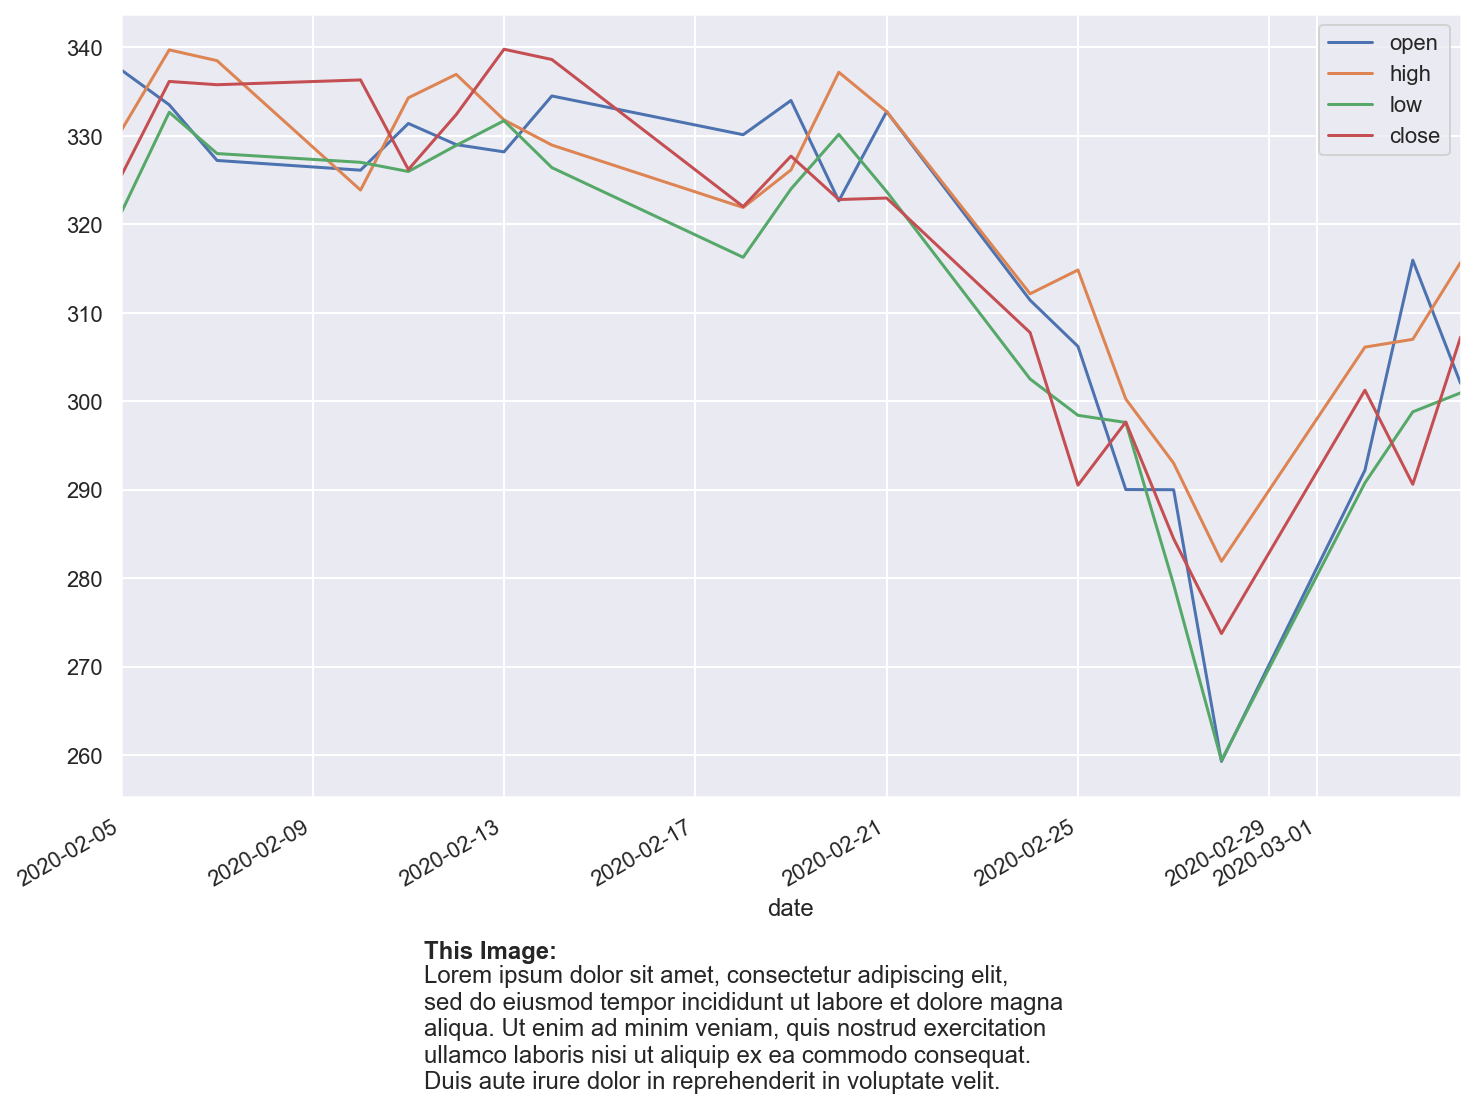

----

## A Grid

And A grid of the data

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

### Sample Table

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>open</th>
      <th>high</th>
      <th>low</th>
      <th>close</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2020-02-05</th>
      <td>337.44</td>
      <td>330.63</td>
      <td>321.35</td>
      <td>325.52</td>
    </tr>
    <tr>
      <th>2020-02-06</th>
      <td>333.51</td>
      <td>339.72</td>
      <td>332.67</td>
      <td>336.15</td>
    </tr>
    <tr>
      <th>2020-02-07</th>
      <td>327.22</td>
      <td>338.50</td>
      <td>328.00</td>
      <td>335.78</td>
    </tr>
    <tr>
      <th>2020-02-10</th>
      <td>326.12</td>
      <td>323.87</td>
      <td>327.01</td>
      <td>336.32</td>
    </tr>
    <tr>
      <th>2020-02-11</th>
      <td>331.40</td>
      <td>334.30</td>
      <td>325.97</td>
      <td>326.19</td>
    </tr>
    <tr>
      <th>2020-02-12</th>
      <td>329.01</td>
      <td>336.95</td>
      <td>328.92</td>
      <td>332.40</td>
    </tr>
    <tr>
      <th>2020-02-13</th>
      <td>328.19</td>
      <td>331.80</td>
      <td>331.71</td>
      <td>339.79</td>
    </tr>
    <tr>
      <th>2020-02-14</th>
      <td>334.51</td>
      <td>328.96</td>
      <td>326.41</td>
      <td>338.63</td>
    </tr>
    <tr>
      <th>2020-02-18</th>
      <td>330.13</td>
      <td>321.90</td>
      <td>316.27</td>
      <td>322.00</td>
    </tr>
    <tr>
      <th>2020-02-19</th>
      <td>334.00</td>
      <td>326.15</td>
      <td>324.00</td>
      <td>327.71</td>
    </tr>
    <tr>
      <th>2020-02-20</th>
      <td>322.65</td>
      <td>337.19</td>
      <td>330.17</td>
      <td>322.80</td>
    </tr>
    <tr>
      <th>2020-02-21</th>
      <td>332.74</td>
      <td>332.74</td>
      <td>323.70</td>
      <td>322.97</td>
    </tr>
    <tr>
      <th>2020-02-24</th>
      <td>311.42</td>
      <td>312.15</td>
      <td>302.51</td>
      <td>307.76</td>
    </tr>
    <tr>
      <th>2020-02-25</th>
      <td>306.20</td>
      <td>314.84</td>
      <td>298.41</td>
      <td>290.51</td>
    </tr>
    <tr>
      <th>2020-02-26</th>
      <td>290.02</td>
      <td>300.25</td>
      <td>297.60</td>
      <td>297.65</td>
    </tr>
    <tr>
      <th>2020-02-27</th>
      <td>290.00</td>
      <td>293.00</td>
      <td>279.28</td>
      <td>284.46</td>
    </tr>
    <tr>
      <th>2020-02-28</th>
      <td>259.29</td>
      <td>281.90</td>
      <td>259.41</td>
      <td>273.74</td>
    </tr>
    <tr>
      <th>2020-03-02</th>
      <td>292.20</td>
      <td>306.12</td>
      <td>290.77</td>
      <td>301.25</td>
    </tr>
    <tr>
      <th>2020-03-03</th>
      <td>315.95</td>
      <td>307.00</td>
      <td>298.80</td>
      <td>290.61</td>
    </tr>
    <tr>
      <th>2020-03-04</th>
      <td>302.02</td>
      <td>315.70</td>
      <td>300.95</td>
      <td>307.25</td>
    </tr>
  </tbody>
</table>

This is where authors provide additional information about the data, including whatever notes are needed.

In [10]:
%matplotlib inline
import pyEX
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

c = pyEX.Client('Tpk_ecc89ddf30a611e9958142010a80043c', version='sandbox')
df = c.chartDF(ticker)
fig = plt.figure(1, clear=True, figsize=(12,8));
ax = fig.add_subplot(111);

_ = df[['open', 'high', 'low', 'close']].plot(ax=ax);
_ = fig.text(.3, -.05, 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, \n'
                       'sed do eiusmod tempor incididunt ut labore et dolore magna \n'
                       'aliqua. Ut enim ad minim veniam, quis nostrud exercitation \n'
                       'ullamco laboris nisi ut aliquip ex ea commodo consequat. \n'
                       'Duis aute irure dolor in reprehenderit in voluptate velit.',
           fontsize=12,
           wrap=True,
           ha='left');
_ = fig.text(.3, .06, 'This Image:',
           fontsize=12,
           weight='bold',
           wrap=True,
           ha='left');


print('# Performance')
print('Now some discussion of the performance, as well as some charts')
print('Lorem ipsum dolor sit amet, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')
print('## A Chart')
print('A chart of some data')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')

plt.show()

newpage()
print('## A Grid')
print('And A grid of the data')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')
table(df[['open', 'high', 'low', 'close']],
      'Sample Table',
      'This is where authors provide additional information about the data, including whatever notes are needed.')

## Peer Correlation

Now another section and additional discussion

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

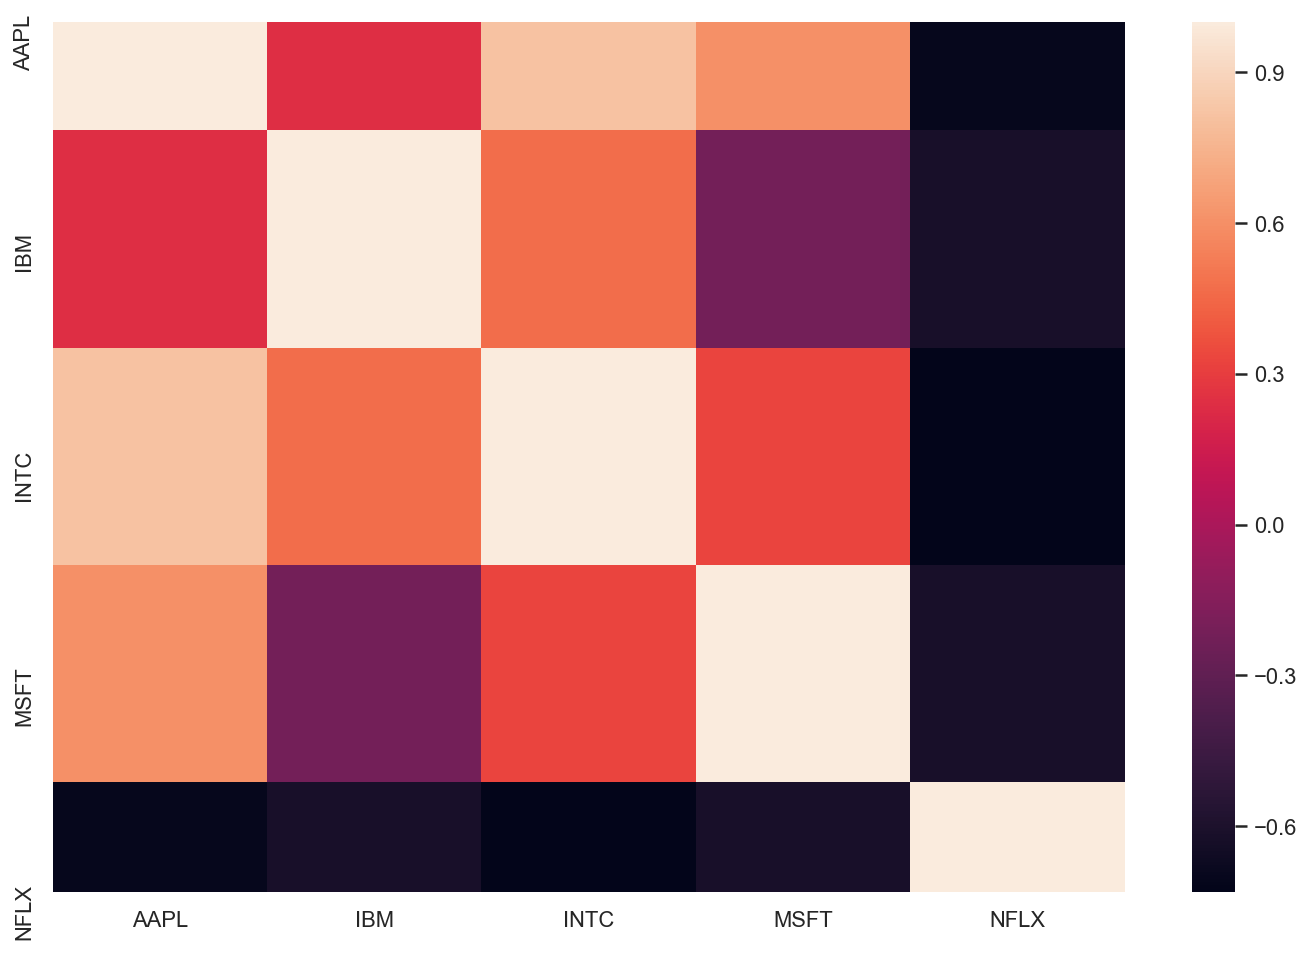

In [11]:
print('## Peer Correlation')
print('Now another section and additional discussion')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')


fig = plt.figure(1, clear=True, figsize=(12,8))
ax = fig.add_subplot(111)

peers = c.peers(ticker)
# doest work for test
peers = ['AAPL', 'IBM', 'NFLX', 'MSFT', 'INTC']
to_merge = {x: c.chartDF(x) for x in peers}
to_merge.update({ticker: df})
all = sorted(list(set(peers + [ticker])))
rets = pd.concat(to_merge)
rets = rets.unstack(0)['changePercent'][all]
rets = rets.corr()
rets['symbol'] = rets.index
_ = sns.heatmap(rets.corr(), ax=ax)

In [12]:
print('#### Disclosures')
print('Finally some required disclosures and whatnot')
print('##### Sub Sub1')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')
print('##### Sub Sub2')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')
print('##### Sub Sub3')
print('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.')


#### Disclosures

Finally some required disclosures and whatnot

##### Sub Sub1

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

##### Sub Sub2

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

##### Sub Sub3

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.